In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

In [3]:
ratings = pd.read_csv("../data/cleaned/cleaned_ratings.csv")
movies = pd.read_csv("../data/cleaned/cleaned_movies.csv")

In [6]:
print(ratings.head())  # Display first rows
print(ratings.dtypes)  # Check data types
print(ratings.isnull().sum())  # Check for NaNs
print(ratings.duplicated(subset=["userId", "movieId"]).sum())  # Check for duplicates

   userId  movieId  rating
0       1        1     4.0
1       1      110     4.0
2       1      158     4.0
3       1      260     4.5
4       1      356     5.0
userId       int64
movieId      int64
rating     float64
dtype: object
userId     0
movieId    0
rating     0
dtype: int64
0


In [8]:
from scipy.sparse import csr_matrix

# Create User-Item matrix in sparse format
user_item_matrix = csr_matrix(
    (ratings["rating"], (ratings["userId"], ratings["movieId"]))
)

print(user_item_matrix.shape)  # Check dimensions

(330976, 288766)


In [9]:
from sklearn.cluster import MiniBatchKMeans

# Choose number of clusters (e.g., 10)
n_clusters = 10  
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=10000)

# Fit clustering model
kmeans.fit(user_item_matrix)

# Assign cluster labels to users
user_clusters = kmeans.labels_

# Print first 10 user clusters
print("First 10 users' clusters:", user_clusters[:10])

First 10 users' clusters: [0 3 2 3 3 3 3 7 0 2]


In [12]:
from sklearn.decomposition import TruncatedSVD

In [13]:
# Reduce dimensions using Truncated SVD (works on sparse data)
svd = TruncatedSVD(n_components=2, random_state=42)
user_vectors_2d = svd.fit_transform(user_item_matrix)

# Store cluster labels with SVD results
user_clusters_df = pd.DataFrame(user_vectors_2d, columns=["PC1", "PC2"])
user_clusters_df["Cluster"] = kmeans.labels_

print(user_clusters_df.head())

         PC1        PC2  Cluster
0   0.000000   0.000000        0
1   9.235184   1.149543        3
2  11.926321 -10.659877        2
3   6.108933   6.807648        3
4   5.648997   3.726936        3


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


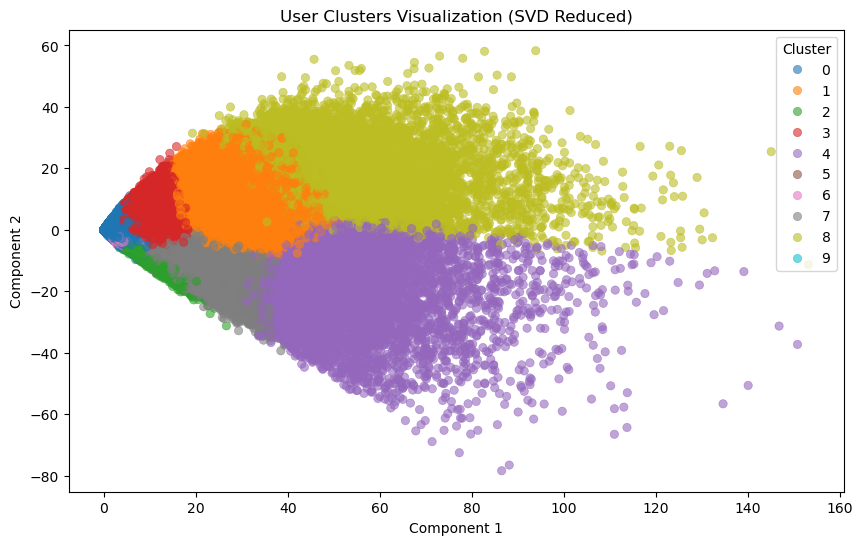

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PC1", y="PC2", hue="Cluster", palette="tab10",
    data=user_clusters_df, alpha=0.6, edgecolor=None
)
plt.title("User Clusters Visualization (SVD Reduced)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.show()